# Exploratory Data Analysis and Customer Purchase Behavior Analysis in Retail

## Problem Statement
A retail company seeks to gain insights into customer purchase behavior, specifically the purchase amount, across various products and categories. To achieve this, the company has provided a dataset that includes a purchase summary of multiple customers for selected high-volume products from the previous month. The dataset contains customer demographics (such as age, gender, marital status, city type, and duration of stay in the current city), product details (including product ID and product category), and the total purchase amount.

The objective is to develop a predictive model to estimate the purchase amount for customers based on their demographic attributes and product details. This model will enable the company to tailor personalized offers and optimize marketing strategies for different customer segments and products, thereby enhancing customer engagement and maximizing sales potential.

## Objectives
* Data preprocessing: Handle missing values, encode categorical variables, and perform feature engineering to prepare the data for analysis.
* Exploratory data analysis (EDA): Analyze the data to understand customer purchase behavior, identify patterns and trends, and explore relationships     between variables.
* Descriptive analysis: Calculate descriptive statistics, generate visualizations, and conduct statistical tests to summarize and highlight key   findings related to customer purchase behavior.
* Customer segmentation: Segment customers based on their purchase behavior to identify distinct groups and understand their characteristics and    preferences.
* Predictive modeling: Build predictive models to forecast customer purchase amounts based on customer demographics and product details using appropriate machine learning algorithms.
* Evaluation and recommendations: Assess the performance of the predictive models, provide insights on factors influencing purchase behavior, and offer recommendations for improving sales and marketing strategies.

## Data Dictionary
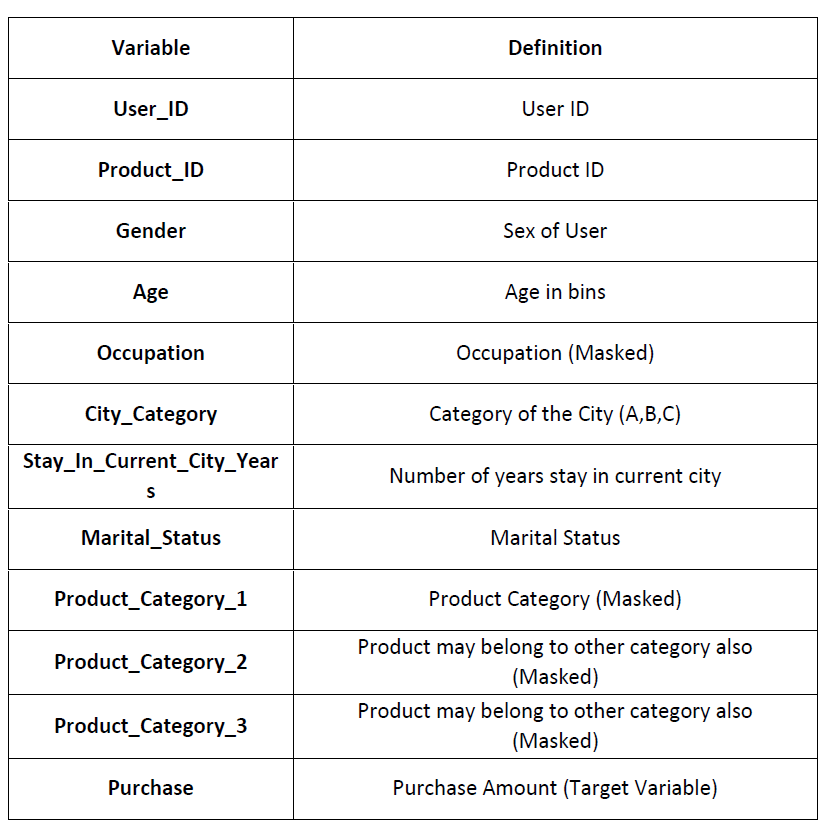




### Data Manipulation and Visualization

#### Importing Libraries and Loading data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading user demograhics data  
data_user_demographics = pd.read_csv("user_demographics.csv")

# Loading user product purchase details
data_user_product_purchase_details = pd.read_csv("user_product_purchase_details_p2.csv")

In [12]:
data_user_product_purchase_details.head()

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,C,4+,0.0,8.0,NaN,NaN,7969.0


In [14]:
data_user_product_purchase_details.shape

(493332, 9)

In [16]:
data_user_product_purchase_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493332 entries, 0 to 493331
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     493332 non-null  int64  
 1   Product_ID                  493331 non-null  object 
 2   City_Category               493331 non-null  object 
 3   Stay_In_Current_City_Years  493331 non-null  object 
 4   Marital_Status              493331 non-null  float64
 5   Product_Category_1          493331 non-null  float64
 6   Product_Category_2          340043 non-null  float64
 7   Product_Category_3          150744 non-null  float64
 8   Purchase                    493331 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 33.9+ MB


In [18]:
data_user_product_purchase_details.describe()

,User_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.933320e+05,493331.000000,493331.000000,340043.000000,150744.000000,493331.000000
mean,1.002972e+06,0.409145,5.298161,9.842846,12.662322,9329.607973
std,2.232927e+03,0.491677,3.749512,5.086935,4.126576,4979.351209
min,1.000000e+01,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001472e+06,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003001e+06,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004404e+06,1.000000,8.000000,15.000000,16.000000,12068.000000
max,1.006040e+06,1.000000,18.000000,18.000000,18.000000,23961.000000


In [20]:
# Since we have 2 csv files with a common column , we will be using merged file for efficient usage
# Merge the two dataframes on 'User_ID'
merged_df = pd.merge(data_user_demographics, data_user_product_purchase_details , on='User_ID', how='inner')

# Rearrange columns to match the format of BlackFridaySales.csv
merged_df = merged_df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
                       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
                       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
                       'Purchase']]

# Save the merged dataframe to a new CSV file
merged_df.to_csv('BlackFridaySales.csv', index=False)

print("Merged dataset saved as BlackFridaySales.csv")


Merged dataset saved as BlackFridaySales.csv


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Loading the merged csv file
sales = pd.read_csv("BlackFridaySales.csv")

In [26]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000001,P00085942,F,0-17,10,A,2,0.0,2.0,4.0,8.0,12842.0


In [28]:
sales.shape

(493331, 12)

In [30]:
sales.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000001  P00085942      F   0-17          10             A   
...         ...        ...    ...    ...         ...           ...   
493326  1001529  P00029542      M  18-25           4             C   
493327  1001529  P00008542      M  18-25           4             C   
493328  1001529  P00302042      M  18-25           4             C   
493329  1001529  P00148442      M  18-25           4             C   
493330  1001529  P00053942      M  18-25           4             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2             0.0     

In [32]:
#Age should be treated as a numerical column

#City_Category we can convert this to a numerical column and should look at the frequency of each city category.

#Gender has two values and should be converted to binary values

#Product_Category_2 and Product_Category_3 are type float and have null values

In [34]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.933310e+05,493331.000000,493331.000000,493331.000000,340043.000000,150744.000000,493331.000000
mean,1.002974e+06,8.081521,0.409145,5.298161,9.842846,12.662322,9329.607973
std,1.716654e+03,6.523545,0.491677,3.749512,5.086935,4.126576,4979.351209
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001472e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003001e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004404e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12068.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [36]:
# Checking Null values
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            153288
Product_Category_3            342587
Purchase                           0
dtype: int64

In [38]:
#Checking percentage of null values
sales.isnull().sum()/sales.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.072039
Product_Category_3            69.443639
Purchase                       0.000000
dtype: float64

In [40]:
#There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

In [42]:
# Changing the Product category 2 and Product category 3 to type int and filling the null values as 0
sales['Product_Category_2'] =sales['Product_Category_2'].fillna(0).astype('int64')
sales['Product_Category_3'] =sales['Product_Category_3'].fillna(0).astype('int64')

In [44]:
# Converting  'Purchase' column to numeric, setting invalid parsing as NaN
sales['Purchase'] = pd.to_numeric(sales['Purchase'], errors='coerce')

In [46]:
# Converting 'Age', 'Gender', and 'City_Category' columns to categorical data type
sales['Age'] = sales['Age'].astype('category')
sales['Gender'] = sales['Gender'].astype('category')
sales['City_Category'] = sales['City_Category'].astype('category')

In [48]:
# Droping duplicates (if any)
sales.drop_duplicates(inplace=True)

In [50]:
# Saving the preprocessed sales DataFrame to a CSV file without the index
sales.to_csv('BlackFridaySales_preprocessed.csv', index=False)

In [51]:
# Data Transformation
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the 'Purchase' column
sales['Purchase_Scaled'] = scaler.fit_transform(sales[['Purchase']])

# Display the first few rows to check the transformation
sales[['Purchase', 'Purchase_Scaled']].head()


,Purchase,Purchase_Scaled
0,8370.0,0.344255
1,15200.0,0.631519
2,1422.0,0.052027
3,1057.0,0.036676
4,12842.0,0.532344


In [54]:
# Apply one-hot encoding to the correct column names
# Replace 'Gender', 'Age', 'City_Category' with the correct column names as needed
sales = pd.get_dummies(sales, columns=['Gender', 'Age', 'City_Category'], drop_first=True)
# Display the first few rows to check the encoding
sales.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Scaled,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,1000001,P00069042,10,2,0.0,3.0,0,0,8370.0,0.344255,False,False,False,False,False,False,False,False,False
1,1000001,P00248942,10,2,0.0,1.0,6,14,15200.0,0.631519,False,False,False,False,False,False,False,False,False
2,1000001,P00087842,10,2,0.0,12.0,0,0,1422.0,0.052027,False,False,False,False,False,False,False,False,False
3,1000001,P00085442,10,2,0.0,12.0,14,0,1057.0,0.036676,False,False,False,False,False,False,False,False,False
4,1000001,P00085942,10,2,0.0,2.0,4,8,12842.0,0.532344,False,False,False,False,False,False,False,False,False


In [56]:
# Create a new column 'Total_Products_Bought'
sales['Total_Products_Bought'] = sales[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].notna().sum(axis=1)

# Display the first few rows to check the new feature
sales[['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Total_Products_Bought']].head()


,Product_Category_1,Product_Category_2,Product_Category_3,Total_Products_Bought
0,3.0,0,0,3
1,1.0,6,14,3
2,12.0,0,0,3
3,12.0,14,0,3
4,2.0,4,8,3


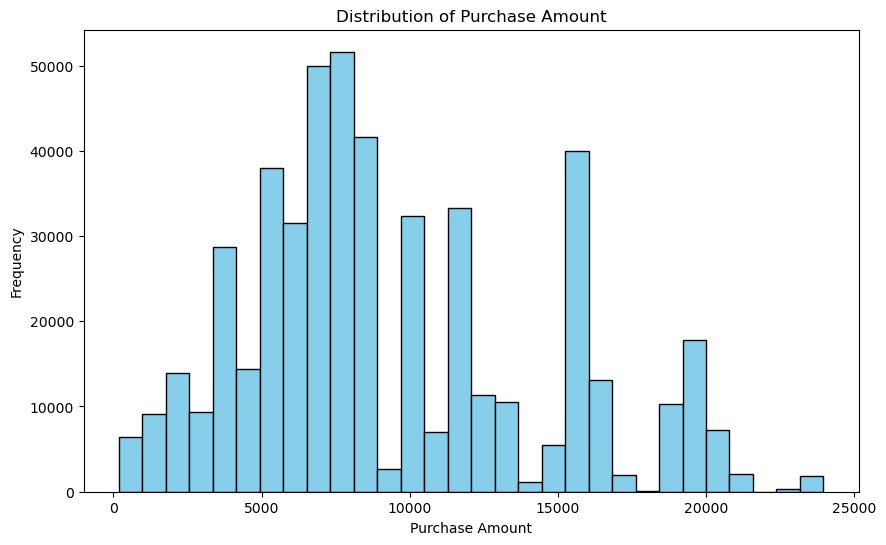

In [58]:
# Data Visualization
# Histogram for 'Purchase' column
plt.figure(figsize=(10, 6))
plt.hist(sales['Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


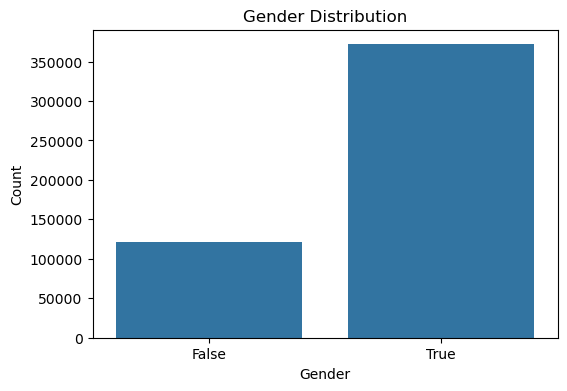

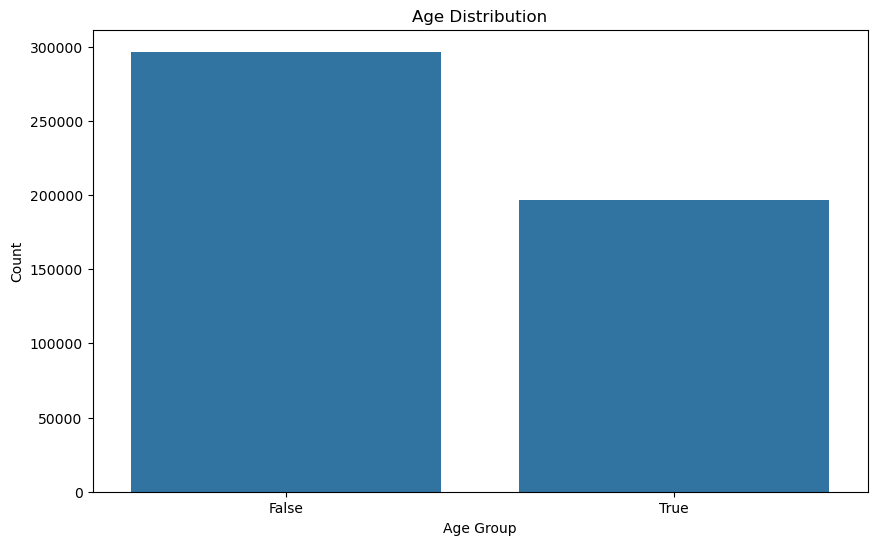

In [60]:
# Bar plot for 'Gender' distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_M', data=sales)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for 'Age' distribution
plt.figure(figsize=(10, 6))
# Use one of the Age categories created by one-hot encoding
sns.countplot(x='Age_26-35', data=sales) 
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


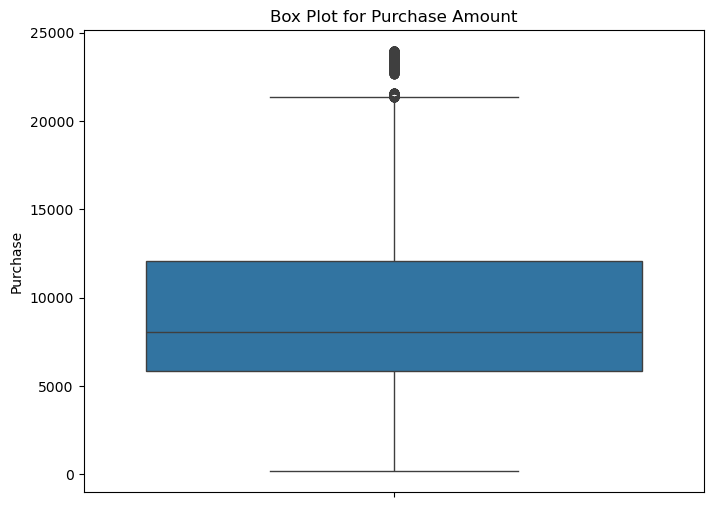

In [61]:
# Box plot for 'Purchase' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=sales['Purchase'])
plt.title('Box Plot for Purchase Amount')
plt.show()


In [63]:
# Check if 'Total_Products_Bought' column exists
print(sales.columns)

# Check the first few rows of the data to verify
print(sales[['Total_Products_Bought', 'Purchase']].head())


Index(['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Purchase_Scaled', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Total_Products_Bought'],
      dtype='object')
   Total_Products_Bought  Purchase
0                      3    8370.0
1                      3   15200.0
2                      3    1422.0
3                      3    1057.0
4                      3   12842.0


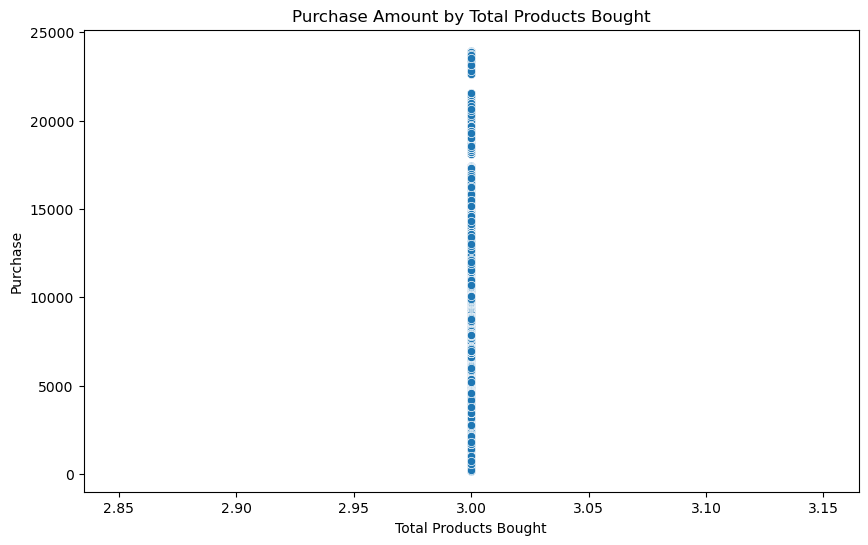

In [66]:
# Scatter plot for Purchase vs. Total_Products_Bought
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Products_Bought', y='Purchase', data=sales)
plt.title('Purchase Amount by Total Products Bought')
plt.xlabel('Total Products Bought')
plt.ylabel('Purchase')
plt.show()


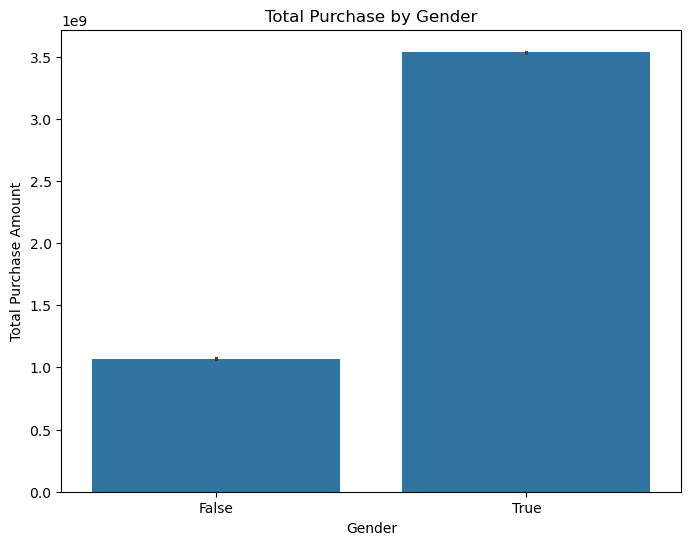

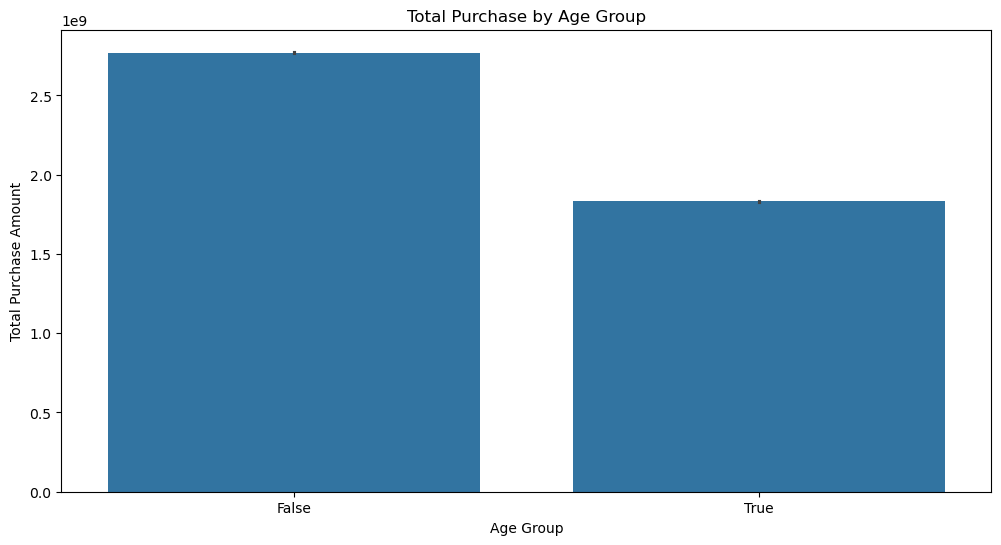

In [68]:
# Purchase amount by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender_M', y='Purchase', data=sales, estimator=sum)
plt.title('Total Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.show()

# Purchase amount by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_26-35', y='Purchase', data=sales, estimator=sum)  # Replace 'Age_26-35' with other age group columns as needed
plt.title('Total Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.show()


In [69]:
# Verify the columns present in the dataframe
print(sales.columns)


Index(['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Purchase_Scaled', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Total_Products_Bought'],
      dtype='object')


In [72]:
# Frequency analysis for Gender (encoded)
gender_freq = sales['Gender_M'].value_counts()
gender_freq.index = ['Female', 'Male']  # Adjust the index to reflect actual gender
print("Frequency of Gender groups:\n", gender_freq)


Frequency of Gender groups:
 Female    371827
Male      121504
Name: count, dtype: int64


In [74]:
# Frequency analysis for Age groups (encoded)
age_columns = ['Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']
age_freq = sales[age_columns].sum()
age_freq.index = ['18-25', '26-35', '36-45', '46-50', '51-55', '55+']  # Adjust the index for readability
print("Frequency of Age groups:\n", age_freq)


Frequency of Age groups:
 18-25     89992
26-35    196781
36-45     98580
46-50     40692
51-55     34497
55+       19225
dtype: int64


In [76]:
# Data Summarization
# Summarizing key insights from the data
summary = {
    'Highest Spending Age Group': sales.groupby('Age_26-35')['Purchase'].sum().idxmax(),  # Replace with relevant column name
    'Highest Spending Gender': 'Male' if sales.groupby('Gender_M')['Purchase'].sum().idxmax() == 1 else 'Female',
    'Top Product Categories': sales.groupby('Product_Category_1')['Purchase'].sum().nlargest(5).index.tolist()
}

print("Summary of Key Insights:")
for key, value in summary.items():
    print(f"{key}: {value}")


Summary of Key Insights:
Highest Spending Age Group: False
Highest Spending Gender: Male
Top Product Categories: [1.0, 5.0, 8.0, 6.0, 2.0]


In [78]:
print(sales.columns)


Index(['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Purchase_Scaled', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Total_Products_Bought'],
      dtype='object')


In [80]:
# Highest spending age group (summing purchases across age groups)
age_spending = {
    '18-25': sales[sales['Age_18-25'] == 1]['Purchase'].sum(),
    '26-35': sales[sales['Age_26-35'] == 1]['Purchase'].sum(),
    '36-45': sales[sales['Age_36-45'] == 1]['Purchase'].sum(),
    '46-50': sales[sales['Age_46-50'] == 1]['Purchase'].sum(),
    '51-55': sales[sales['Age_51-55'] == 1]['Purchase'].sum(),
    '55+': sales[sales['Age_55+'] == 1]['Purchase'].sum(),
}
highest_spending_age_group = max(age_spending, key=age_spending.get)

# Highest spending gender
gender_spending = sales.groupby('Gender_M')['Purchase'].sum()
highest_spending_gender = 'Male' if gender_spending.idxmax() == 1 else 'Female'

# City category with highest spending (City B, C, or A if neither)
city_spending = {
    'City A': sales[(sales['City_Category_B'] == 0) & (sales['City_Category_C'] == 0)]['Purchase'].sum(),
    'City B': sales[sales['City_Category_B'] == 1]['Purchase'].sum(),
    'City C': sales[sales['City_Category_C'] == 1]['Purchase'].sum(),
}
highest_spending_city_category = max(city_spending, key=city_spending.get)

# Marital status influence on spending
marital_spending = sales.groupby('Marital_Status')['Purchase'].sum()
highest_spending_marital_status = 'Married' if marital_spending.idxmax() == 1 else 'Unmarried'

# Total products bought by different customer segments
total_products_bought_by_age = {
    '18-25': sales[sales['Age_18-25'] == 1]['Total_Products_Bought'].sum(),
    '26-35': sales[sales['Age_26-35'] == 1]['Total_Products_Bought'].sum(),
    '36-45': sales[sales['Age_36-45'] == 1]['Total_Products_Bought'].sum(),
    '46-50': sales[sales['Age_46-50'] == 1]['Total_Products_Bought'].sum(),
    '51-55': sales[sales['Age_51-55'] == 1]['Total_Products_Bought'].sum(),
    '55+': sales[sales['Age_55+'] == 1]['Total_Products_Bought'].sum(),
}

# Summary dictionary
summary = {
    'Highest Spending Age Group': highest_spending_age_group,
    'Highest Spending Gender': highest_spending_gender,
    'City Category with Highest Spending': highest_spending_city_category,
    'Marital Status with Highest Spending': highest_spending_marital_status,
    'Total Products Bought by Age Group': total_products_bought_by_age,
}

# Print the summary of key insights
print("Summary of Key Insights:")
for key, value in summary.items():
    print(f"{key}: {value}")


Summary of Key Insights:
Highest Spending Age Group: 26-35
Highest Spending Gender: Male
City Category with Highest Spending: City B
Marital Status with Highest Spending: Unmarried
Total Products Bought by Age Group: {'18-25': 269976, '26-35': 590343, '36-45': 295740, '46-50': 122076, '51-55': 103491, '55+': 57675}


# CheckPoint 1.2

In [83]:
#Descriptive statistics for both numerical and categorical and draw a few insights from 
# them. (Univariate Analysis) 
numerical_columns = sales.select_dtypes(include=['number'])
numerical_desc = numerical_columns.describe()
numerical_desc

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Scaled,Total_Products_Bought
count,4.933310e+05,493331.000000,493331.000000,493331.000000,493331.000000,493331.000000,493331.000000,493331.000000,493331.0
mean,1.002974e+06,8.081521,0.409145,5.298161,6.784473,3.869145,9329.607973,0.384615,3.0
std,1.716654e+03,6.523545,0.491677,3.749512,6.211755,6.263022,4979.351209,0.209428,0.0
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,185.000000,0.000000,3.0
25%,1.001472e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5866.000000,0.238938,3.0
50%,1.003001e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8061.000000,0.331258,3.0
75%,1.004404e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12068.000000,0.499790,3.0
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000,1.000000,3.0


In [85]:
categorical_columns = sales.select_dtypes(include=['object', 'category'])
categorical_desc = categorical_columns.describe()
categorical_desc

,Product_ID,Stay_In_Current_City_Years
count,493331,493331
unique,3611,5
top,P00265242,1
freq,1688,173444


<Axes: xlabel='Occupation', ylabel='count'>

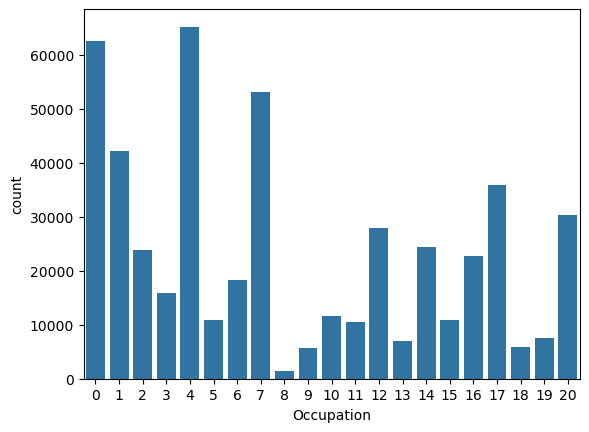

In [87]:
sns.countplot(x=sales['Occupation'])

The graph shows that top three Occupations with the majority of buyers is 4,0,7

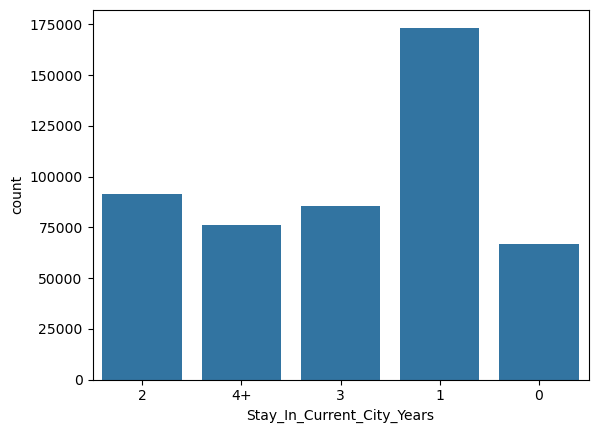

In [96]:
sns.countplot(x=sales['Stay_In_Current_City_Years'])
plt.show()

The graph shows that majority people buying during sales have lived in the current city for an year.

## Bivariate/Multivariate Analysis

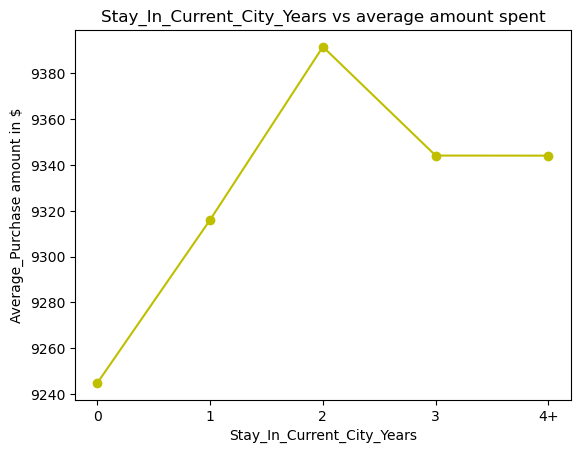

In [100]:
data = sales.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

The people who have been living in the current city for 2 or more years are on an average spending more amount in the black friday sales

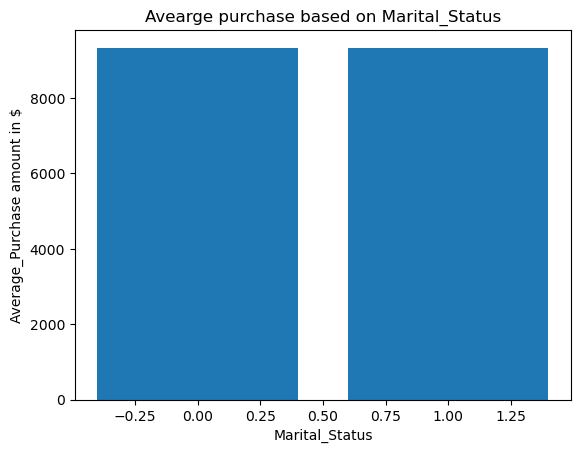

In [103]:
data = sales.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()

Purchasers who married or not, have almost same average of purchase.

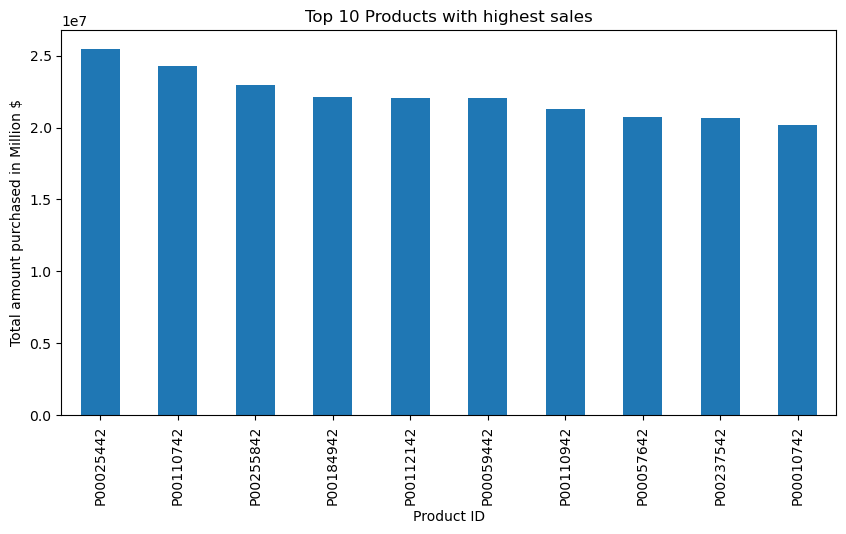

In [105]:
data = sales.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

In [109]:
#Missing values identification and treatment  
sales.isnull().sum()

User_ID                       0
Product_ID                    0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Purchase_Scaled               0
Gender_M                      0
Age_18-25                     0
Age_26-35                     0
Age_36-45                     0
Age_46-50                     0
Age_51-55                     0
Age_55+                       0
City_Category_B               0
City_Category_C               0
Total_Products_Bought         0
dtype: int64

In [111]:
sales.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Purchase_Scaled', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Total_Products_Bought'],
      dtype='object')

Outlier analysis and treatment  

In [154]:
df = pd.DataFrame(sales['Purchase'])

# Calculate the first and third quartiles
Q1 = sales['Purchase'].quantile(0.25)
Q3 = sales['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (sales['Purchase'] < lower_bound) | (sales['Purchase'] > upper_bound)
print("Outliers identified:")
print(outliers.any())  # Check if there are any outliers

# Filter the DataFrame to exclude outliers
sales = sales[(sales['Purchase'] >= lower_bound) & (sales['Purchase'] <= upper_bound)]
#outliers removerd
print(sales['Purchase']) 
sales.isna().sum()

Outliers identified:
False
0          8370.0
1         15200.0
2          1422.0
3          1057.0
4         12842.0
           ...   
493326    19330.0
493327    13037.0
493328     1804.0
493329    16245.0
493330    15185.0
Name: Purchase, Length: 490727, dtype: float64


User_ID                       0
Product_ID                    0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Purchase_Scaled               0
Gender_M                      0
Age_18-25                     0
Age_26-35                     0
Age_36-45                     0
Age_46-50                     0
Age_51-55                     0
Age_55+                       0
City_Category_B               0
City_Category_C               0
Total_Products_Bought         0
dtype: int64

In [159]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
sales['Purchase_MinMax'] = min_max_scaler.fit_transform(sales[['Purchase']])

# Z-score Normalization
standard_scaler = StandardScaler()
sales['Purchase_ZScore'] = standard_scaler.fit_transform(sales[['Purchase']])

sales.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Scaled,...,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Total_Products_Bought,Purchase_MinMax,Purchase_ZScore
0,1000001,P00069042,10,2,0.0,3.0,0,0,8370.0,0.344255,...,False,False,False,False,False,False,False,3,0.387749,-0.181288
1,1000001,P00248942,10,2,0.0,1.0,6,14,15200.0,0.631519,...,False,False,False,False,False,False,False,3,0.711308,1.215603
2,1000001,P00087842,10,2,0.0,12.0,0,0,1422.0,0.052027,...,False,False,False,False,False,False,False,3,0.058601,-1.602313
3,1000001,P00085442,10,2,0.0,12.0,14,0,1057.0,0.036676,...,False,False,False,False,False,False,False,3,0.041309,-1.676964
4,1000001,P00085942,10,2,0.0,2.0,4,8,12842.0,0.532344,...,False,False,False,False,False,False,False,3,0.599602,0.733338


Data Transformation and Feature Extraction has already been done above

T-Test

In [ ]:
from scipy.stats import ttest_rel
from statsmodels.stats import weightstats as st

In [ ]:
tstas, pvalue=ttest_rel(sales['Product_Category_1'], sales['Product_Category_2'])
if pvalue<0.001:
    print("reject the null hypothesis based on the sample")
else:
    print("Accept the null hypothesis based on the sample")

Anova

In [ ]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(sales['Product_Category_1'], sales['Product_Category_2'])
if p_value < 0.05:
    print("Null hypothesis can be rejected based on the sample data")
else:
    print("Null hypothesis can be accepted based on the sample data")


Chi-Squared

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(sales['Product_Category_1'], sales['Product_Category_2'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Null hypothesis can be rejected based on the sample data")

else:
    print("Null hypothesis can be accepted based on the sample data")